In [ ]:
#Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

In [3]:
import pandas as pd


In [5]:
data1 =  pd.read_csv('D:/Mall_Customers.csv')
print(data1.head(5))

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [8]:
print(data1.info())
print(data1.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

In [13]:
#Converting Gender data to numerical

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
data1['Gender']=le.fit_transform(data1['Gender'])

In [16]:
#select feature for clustering 


features = data1[['Age','Gender','Annual Income (k$)','Spending Score (1-100)']]

In [18]:
#Scale the feature

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
feature_scaled = scaler.fit_transform(features)


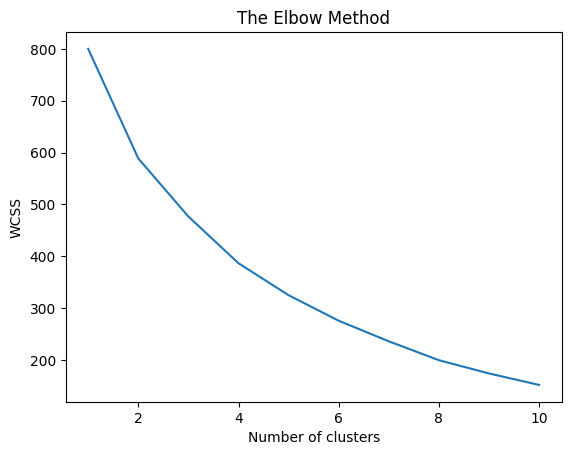

In [20]:
#Use Elbow Method to determine the optimal number of clusters

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1 ,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',max_iter=300,n_init=10,random_state=42)
    kmeans.fit(feature_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
#Apply K-means :

optimal_clusters = 3 # replace with the number 
kmeans =KMeans(n_clusters=optimal_clusters,init='k-means++',max_iter=300,n_init=10,random_state=42)
clusters = kmeans.fit_predict(feature_scaled)

In [30]:
#Add cluster labels to original data

data1['Cluster'] = clusters
print(data1.head(5))

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       1   19                  15                      39   
1           2       1   21                  15                      81   
2           3       0   20                  16                       6   
3           4       0   23                  16                      77   
4           5       0   31                  17                      40   

   Cluster  
0        0  
1        0  
2        1  
3        0  
4        1  


In [32]:
#Analyze the clusters

print(data1.groupby('Cluster').mean())

         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0        104.364706  0.458824  28.047059           61.788235   
1         92.560606  0.000000  45.075758           57.727273   
2        104.489796  1.000000  49.204082           62.244898   

         Spending Score (1-100)  
Cluster                          
0                     72.882353  
1                     36.181818  
2                     29.734694  


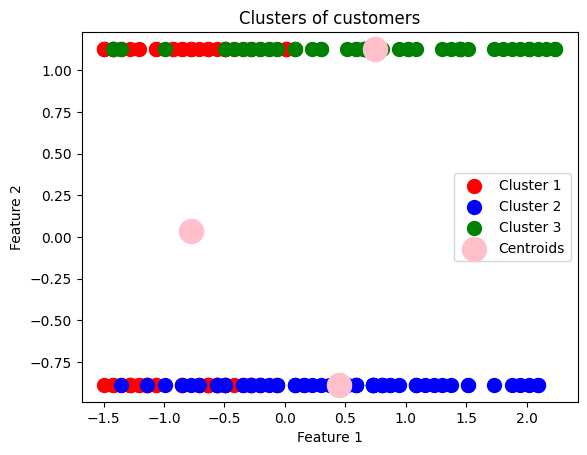

In [37]:
#Visualize the clusters

plt.scatter(feature_scaled[clusters == 0,0], feature_scaled[clusters == 0,1], s=100 ,c='red' ,label='Cluster 1')
plt.scatter(feature_scaled[clusters == 1,0], feature_scaled[clusters == 1,1], s=100 ,c='blue' ,label='Cluster 2')
plt.scatter(feature_scaled[clusters == 2,0], feature_scaled[clusters == 2,1], s=100 ,c='green' ,label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='pink',label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()